In [8]:
import numpy as np
import matplotlib.pyplot as plt

from metpy.mapping.MPMap import MPMap
from metpy.mapping.points import *
from metpy.mapping.triangles import *
from metpy.mapping.tests.test_MPGridding import create_test_data

from mpl_toolkits import basemap
from scipy.spatial import Voronoi, Delaunay, ConvexHull
from scipy.spatial.distance import euclidean

from matplotlib.delaunay.triangulate import Triangulation

from collections import deque

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 16)

m = basemap.Basemap(
    width=4800000, height=3100000, projection='aea', resolution='l',
    lat_1=28.5, lat_2=44.5, lat_0=38.5, lon_0=-97.,area_thresh=5000)

wgs84 = basemap.pyproj.Proj("+init=EPSG:4326")
aea = basemap.pyproj.Proj(m.projparams) #'+init=EPSG:5069')

 

def plot_triangle(triangle):
    x = [triangle[0,0], triangle[1,0], triangle[2,0], triangle[0,0]]
    y = [triangle[0,1], triangle[1,1], triangle[2,1], triangle[0,1]]
    
    plt.plot(x, y, "-", linewidth=4)

def calc_voronoi_lines(vor):
    
    for simplex in vor.ridge_vertices:
        simplex = np.asarray(simplex)
        if np.all(simplex >= 0):
            plt.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k--')
        

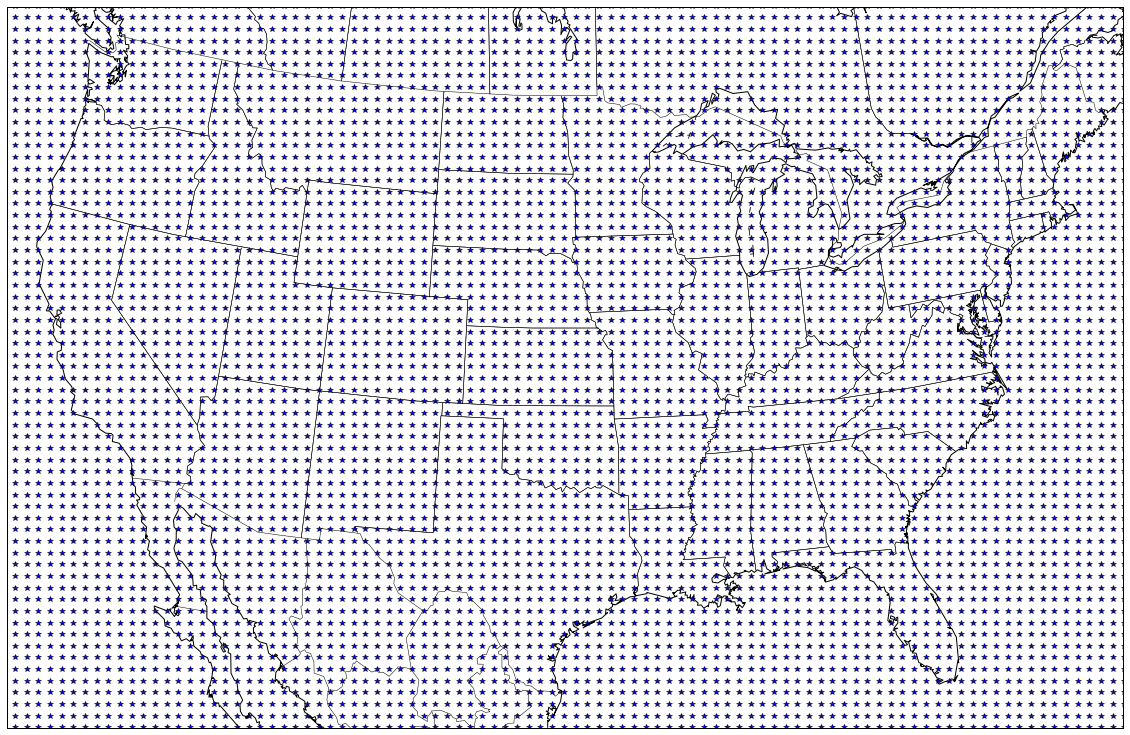

In [2]:
x, y, t = create_test_data("air_temperature")

m.drawstates()
m.drawcountries()
m.drawcoastlines()

xp, yp = basemap.pyproj.transform(wgs84, aea, x, y)

xg, yg = generate_grid(50000, 50000, get_boundary_coords(xp, yp, spatial_pad = 500000))

bbox = get_boundary_coords(xp, yp, spatial_pad = 1000)

xstep, ystep = get_xy_steps(bbox, 10000, 10000)

grid_points = generate_grid_coords(xg, yg)

plt.plot(grid_points[:,0], grid_points[:,1], '*')



C:\Users\ahaberli\anaconda3\envs\unidata3\lib\site-packages\matplotlib\delaunay\triangulate.py:108: DuplicatePointWarning: Input data contains duplicate x,y points; some values are ignored.
  DuplicatePointWarning,


[ 3045355.74580294   879469.16181089]
[[ 2896418.81230564   903298.37489705]
 [ 3045355.74580294   879469.16181089]
 [ 2953500.06516823  1003584.2115782 ]]
[[ 2896418.81230564   903298.37489705]
 [ 2953500.06516823  1003584.2115782 ]
 [ 2875171.84542795   918284.51282125]]
[[ 2896418.81230564   903298.37489705]
 [ 2875171.84542795   918284.51282125]
 [ 2862632.93966879   890831.7262912 ]]
[[ 2896418.81230564   903298.37489705]
 [ 2862632.93966879   890831.7262912 ]
 [ 2936303.8788946    794008.06400112]]
[[ 2896418.81230564   903298.37489705]
 [ 2936303.8788946    794008.06400112]
 [ 3045355.74580294   879469.16181089]]


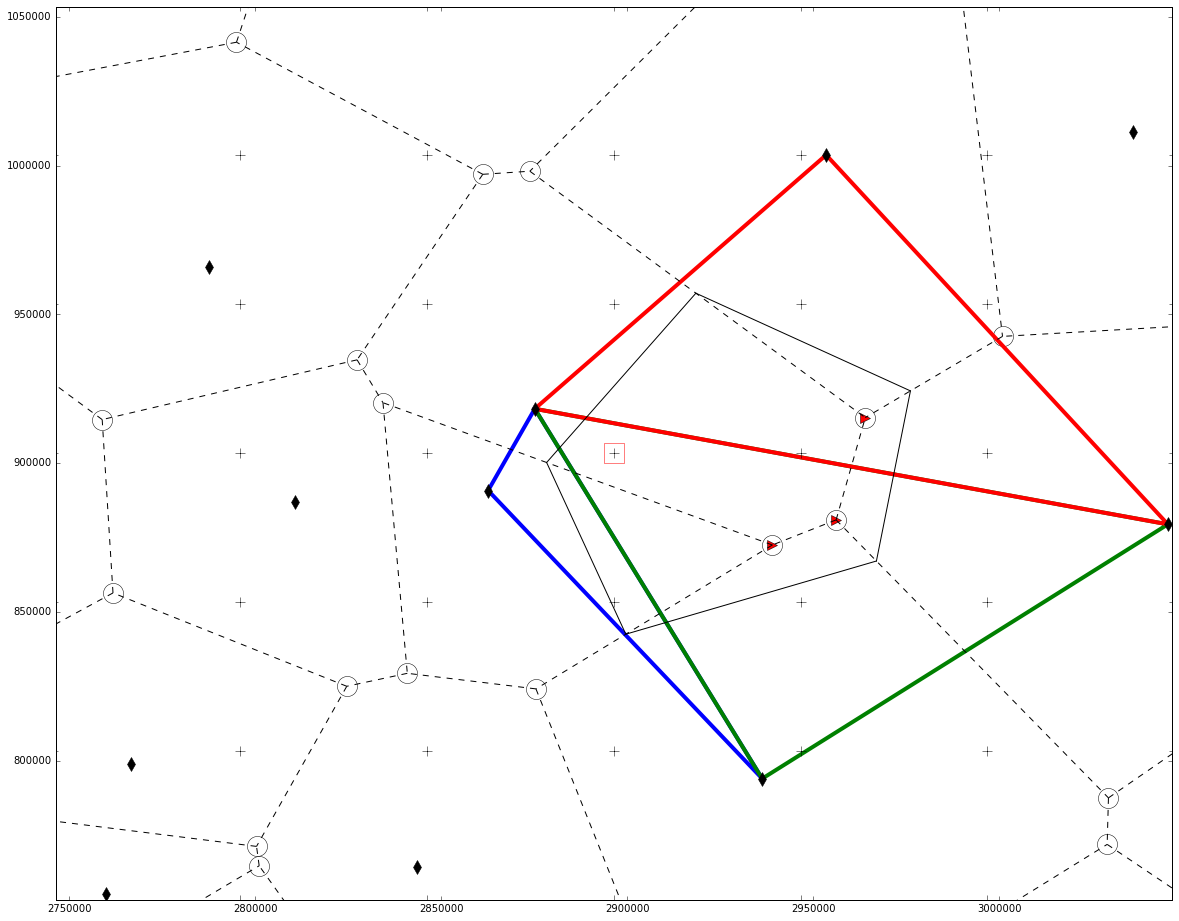

In [30]:
import time

points = list(zip(xp, yp))

vor = Voronoi(points, incremental=True)

tri = Delaunay(points)

tri_match = tri.find_simplex(grid_points)

t = Triangulation(xp, yp)

n_list = set()

cur_tri = tri_match[4500]
grid = grid_points[4500]

#time1 = time.time()

#for cur_tri, grid in zip(tri_match, grid_points):
    
neighbors = find_nn(tri, cur_tri, grid)

points = []
for neighbor in neighbors:
    for point in tri.points[tri.simplices[neighbor]]:
        points.append(point)
        
        
points = np.array(points)
print(point)

hull = ConvexHull(points)

print(ch)

plt.plot(t.circumcenters[:,0], t.circumcenters[:,1], "ko", markersize=20, fillstyle='none')

for neighbor in neighbors:
    
    triangle = tri.points[tri.simplices[neighbor]]
    cur_x, cur_y = circumcenter(triangle)
    
    plt.plot(cur_x, cur_y, "r>", markersize=10)
    plot_triangle(tri.points[tri.simplices[neighbor]])

#plt.legend(numpoints=1)

xlow = grid[0] - 150000
xhigh = grid[0] + 150000
ylow = grid[1] - 150000
yhigh = grid[1] + 150000
plt.xlim(xlow, xhigh)
plt.ylim(ylow, yhigh)
#plt.plot(grid_points, "bo")

plt.plot(grid_points[:,0], grid_points[:,1], 'k+', markersize=10)
plt.plot(grid[0], grid[1], "rs", markersize=20, fillstyle='none')

new_centers = []
for i in range(len(hull.vertices)):
    
    p1 = points[hull.vertices[i]]
    p2 = points[hull.vertices[(i+1)%len(hull.vertices)]]
    
    triangle = np.array([grid, p1, p2])
    
    print(triangle)
    
    new_centers.append(circumcenter(triangle))

new_centers = np.array(new_centers)

for i in range(len(new_centers)):
    
    i1 = (i+1)%len(new_centers)
    
    x = [new_centers[i,0], new_centers[i1,0]]
    y = [new_centers[i,1], new_centers[i1,1]]
    
    plt.plot(x, y, "k-")
    


plot_voronoi_lines(plt, vor)    
    
plt.plot(xp, yp, "kd", markersize=10)

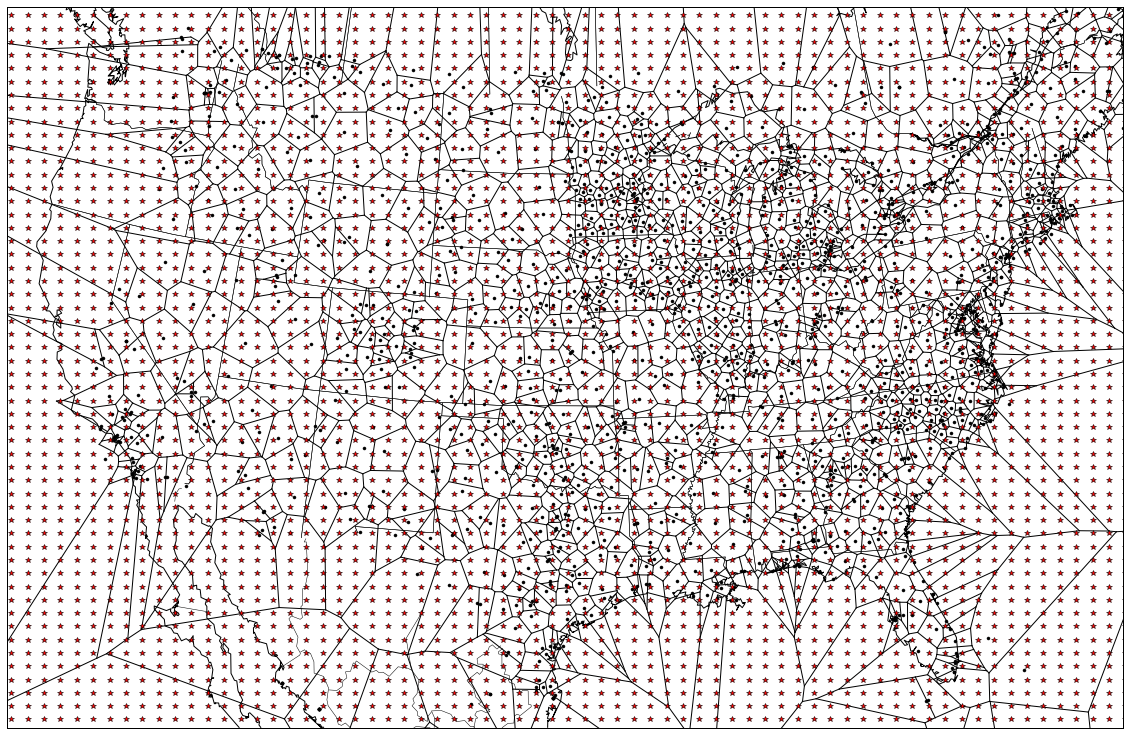

In [47]:
plt.plot(t.circumcenters[:,0], t.circumcenters[:,1], "ko", markersize=20, fillstyle='none')

#plt.legend(numpoints=1)

xlow = grid[0] - 150000
xhigh = grid[0] + 150000
ylow = grid[1] - 150000
yhigh = grid[1] + 150000
plt.xlim(xlow, xhigh)
plt.ylim(ylow, yhigh)
#plt.plot(grid_points, "bo")

plt.plot(grid_points[:,0], grid_points[:,1], 'k+', markersize=10)
plt.plot(grid[0], grid[1], "rs", markersize=20, fillstyle='none')

#points.append((grid[0], grid[1]))
vor = Voronoi(points, incremental=True)

calc_voronoi_lines(vor)

view = basemap.Basemap(width=4800000, height=3100000, projection='aea', resolution='l',
                       lat_1=28.5, lat_2=44.5, lat_0=38.5, lon_0=-97.,area_thresh=10000)

lons, lats, z = create_test_data("air_temperature")

xp, yp = view(lons, lats)

xg, yg, img = interp_points(xp, yp, z, interp_type='nearest', xres=100, yres=100)

points = np.array(list(zip(xp, yp)))

tri = Delaunay(points)
vor = Voronoi(points)

calc_voronoi_lines(vor)

#vor = Voronoi(list(zip(xg.flatten(), yg.flatten())))

#calc_voronoi_lines(vor)

plt.plot(xp, yp, "k.")
plt.plot(xg, yg, "r*")
    
view.drawstates()
view.drawcoastlines()

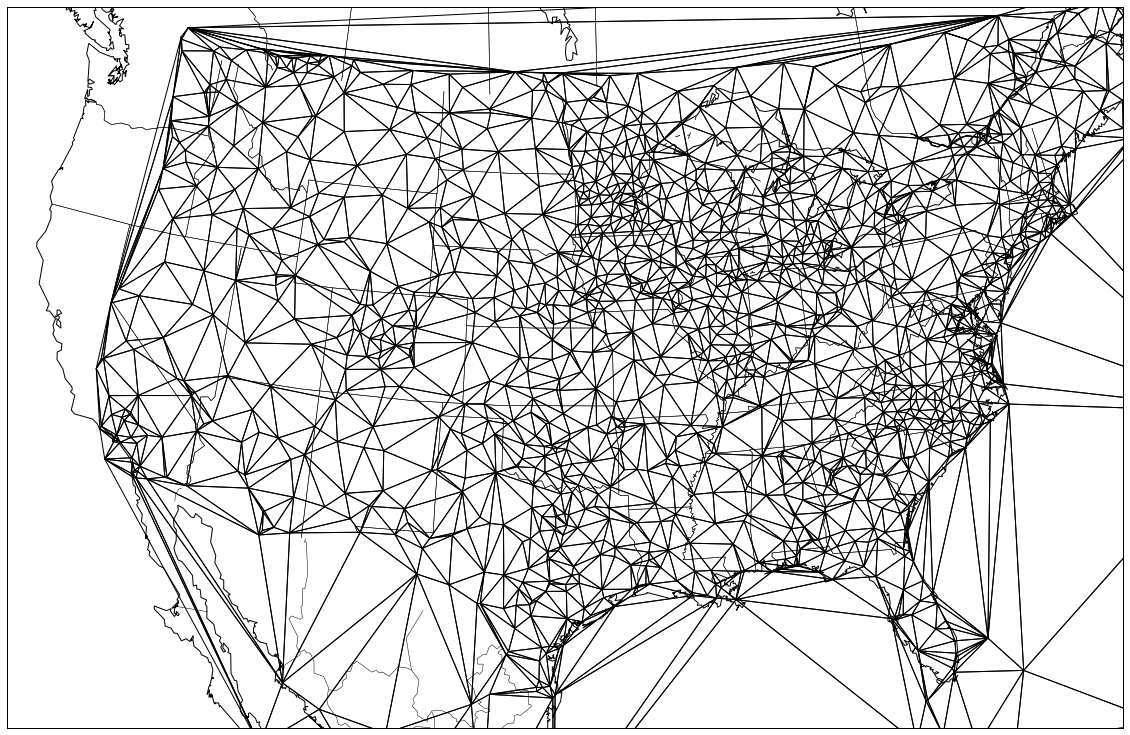

In [40]:
for x1,y1,z1 in tri.simplices:
    x = tri.points[x1]
    y = tri.points[y1]
    z = tri.points[z1]
    
    plt.plot([x[0], y[0], z[0], x[0]], [x[1], y[1], z[1], x[1]], 'k-')
    
view.drawstates()
view.drawcoastlines()

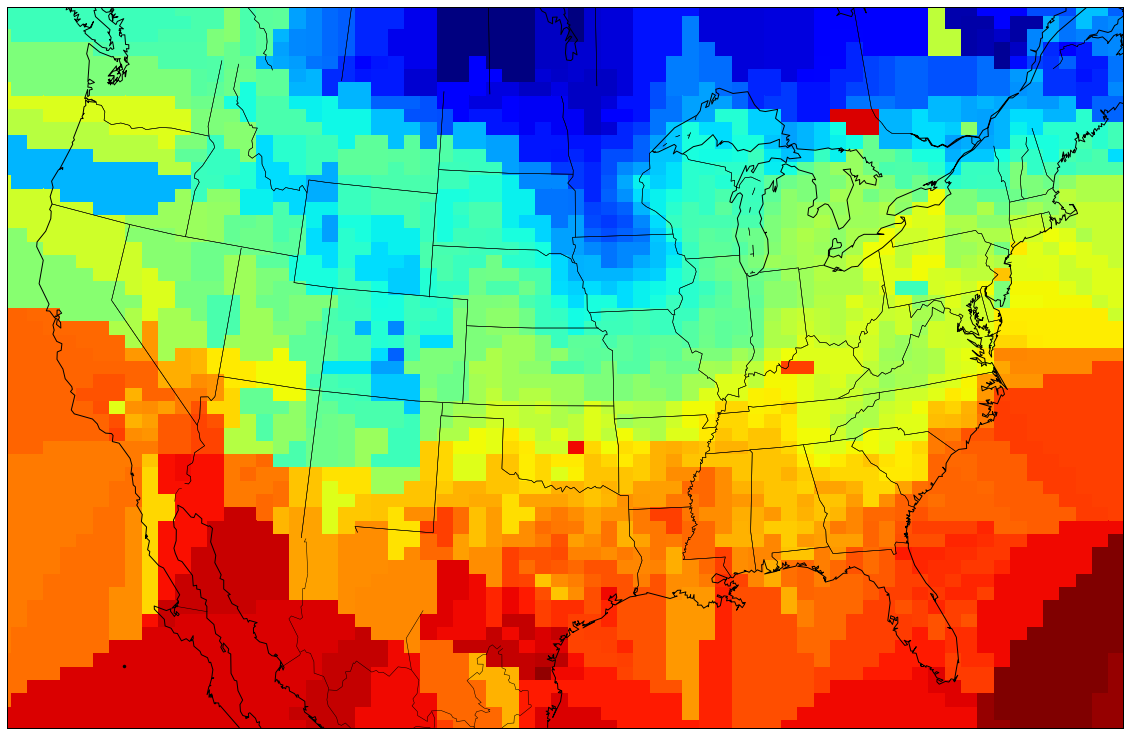

In [54]:
#xg, yg, img = interp_points(xp, yp, z, interp_type='nearest', xres=1000, yres=1000)

img = np.ma.masked_where(np.isnan(img), img)

view.pcolormesh(xg, yg, img)

view.drawstates()
view.drawcoastlines()

plt.plot(500542.49751149, 264818.7300147, "k.")

In [50]:
xg[50]

array([ 2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751149,  2906542.49751149,
        2906542.49751149,  2906542.49751

In [ ]:
triangles = Triangulation(xp, yp)

natn = NNInterpolator(triangles, t)

print(dir(nn_grid))

cur_slice = (slice(bbox['southwest'][1],bbox['northeast'][1],ystep*1j), \
             slice(bbox['southwest'][0], bbox['northeast'][0], xstep*1j))

print(triangles)
nngrid = natn.__getitem__(cur_slice)

nngrid = np.ma.masked_where(np.isnan(nngrid), nngrid)
plt.pcolormesh(xg, yg, nngrid)

def calc_voronoi_lines(vor):
    
    for simplex in vor.ridge_vertices:
        simplex = np.asarray(simplex)
        if np.all(simplex >= 0):
            plt.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k-')

    center = points.mean(axis=0)

#    for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
#        simplex = np.asarray(simplex)
#        if np.any(simplex < 0):
#            i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
#            t = points[pointidx[1]] - points[pointidx[0]]  # tangent
#            t = t / np.linalg.norm(t)
#            n = np.array([-t[1], t[0]])  # normal
#            midpoint = points[pointidx].mean(axis=0)
#            far_point = vor.vertices[i] + np.sign(np.dot(midpoint - center, n)) * n * 100
#            plt.plot([vor.vertices[i, 0], far_point[0]], [vor.vertices[i, 1], far_point[1]], 'k--')


In [182]:
triangle = tri.points[tri.simplices[cur_tri]]

area = 0

for i in range(len(triangle)):
    
    p1 = v[i]
    p2 = v[(i+1)%3]
    
    area += np.cross(p1, p2)
    
print(.5*area)


3319766434.15


[array([1, 1]), array([4, 4]), array([4, 1])]


TypeError: list indices must be integers, not tuple

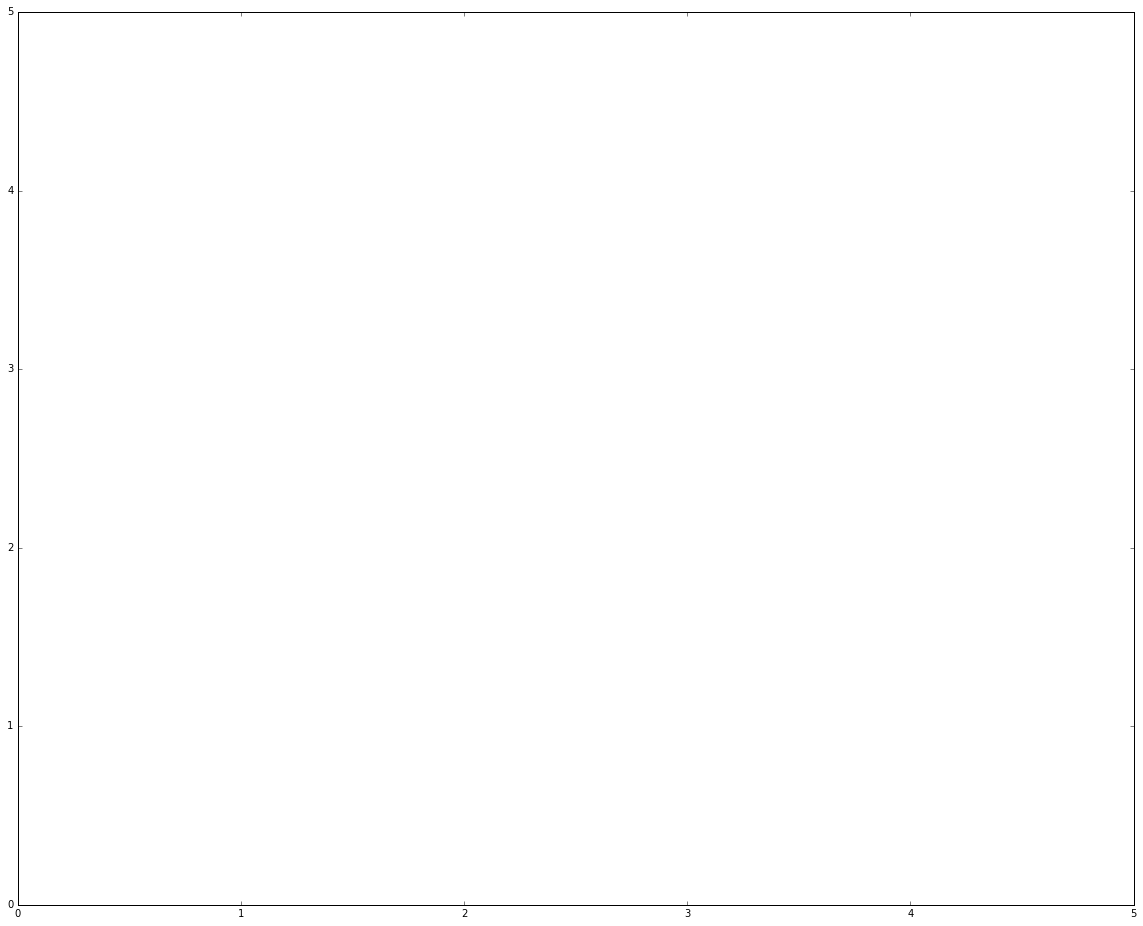

In [166]:
a = np.array([1,1])
b = np.array([4,4])
c = np.array([4,1])

t = [a,b,c]

print(t)

plt.xlim(0,5)
plt.ylim(0,5)
plot_triangle(t, 0, 'k')